In [1]:
from tscsRL.environments.TSCSEnv import DiscreteTSCSEnv, ContinuousTSCSEnv
from tscsRL.environments.GradientTSCSEnv import DiscreteGradientTSCSEnv, ContinuousGradientTSCSEnv
from tscsRL.environments.RadiiTSCSEnv import DiscreteRadiiTSCSEnv, ContinuousRadiiTSCSEnv
from tscsRL.agents import ddqn, ddpg
from tscsRL import utils
import imageio
import torch

In [2]:
name = 'ddqnRadii-3.1'
path = 'results/' + name
env_params = utils.jsonToDict(path + '/env_params.json')
agent_params = utils.jsonToDict(path + '/agent_params.json')

In [3]:
env = DiscreteRadiiTSCSEnv(
    kMax=env_params['kMax'],
    kMin=env_params['kMin'],
    nFreq=env_params['nFreq'])

agent = ddqn.DDQNAgent(
    env.observation_space,
    env.action_space,
    agent_params,
    name)
agent.epsilon = 0.05

In [4]:
agent.load_checkpoint(path + '/checkpoints/', 3400)

In [18]:
## Starting from a random config
state = env.reset()
## End starting from random config

## Starting from a predefined config
# env.config = torch.tensor([[ 4.9073,  0.9211,  2.3434, -4.5528,  2.6180,  4.6988, -2.3804,  1.6361]])
# env.counter = torch.tensor([[0.0]])
# env.setMetric(env.config)

# env.info['initial'] = env.RMS.item()
# env.info['lowest'] = env.info['initial']
# env.info['final'] = None
# env.info['score'] = 0
# state = env.getState()
## End starting from random config

done = False

results = {
    'radii': [],
    'rms': [],
    'tscs': []}

while not done:
    results['radii'].append(env.radii)
    results['rms'].append(env.RMS)
    results['tscs'].append(env.TSCS)

    action = agent.select_action(state)
    nextState, reward, done, info = env.step(action)

#     print(reward, done)
    state = nextState

## Initial stuff
initialRadii = results['radii'][0]
initialRMS = results['rms'][0]
initialTSCS = results['tscs'][0]

## Optimal stuff
minIdx = results['rms'].index(min(results['rms']))
optimalRadii = results['radii'][minIdx]
optimalRMS = results['rms'][minIdx]
optimalTSCS = results['tscs'][minIdx]

print('RESULTS:')
print(f'Initial radii: {initialRadii}')
print(f'Initial RMS: {initialRMS}')
print(f'Initial TSCS: {initialTSCS}')
print()
print(f'Min radii: {optimalRadii}')
print(f'Min rms: {optimalRMS}')
print(f'Min tscs: {optimalTSCS}')

RESULTS:
Initial radii: tensor([[0.8942, 0.4284, 0.8115, 0.2863, 0.9368, 0.5537, 0.6178, 0.6762, 0.9312]])
Initial RMS: tensor([[8.4916]])
Initial TSCS: tensor([[ 4.2936,  6.4494,  5.1902, 22.9228,  9.8103,  5.8792,  4.2756,  3.4130,
          2.8839,  2.5353,  2.2960]])

Min radii: tensor([[0.2942, 0.3084, 0.8915, 0.5663, 0.2568, 0.3137, 0.6178, 0.8762, 0.2912]])
Min rms: tensor([[3.1147]])
Min tscs: tensor([[5.4951, 2.8699, 1.3847, 5.9420, 3.3988, 2.5349, 2.0545, 1.7434, 1.5283,
         1.3746, 1.2636]])


In [16]:
import matplotlib.pyplot as plt

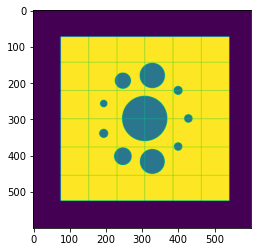

In [19]:
plt.imshow(env.getIMG(optimalRadii).view(env.img_dim))